In [ ]:
# ===============================
# 📌 STEP 1: Mount Google Drive
# ===============================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ===============================
# 📌 STEP 2: Setup Paths & Extract ZIP
# ===============================
import zipfile, os, shutil

zip_path = "/content/drive/MyDrive/dataset.zip"  # path to your ZIP
extract_path = "/content/dataset"               # folder to extract in Colab

# Extract only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Dataset extracted to: {extract_path}")
else:
    print("✅ Dataset already extracted.")

# Remove __MACOSX folder if it exists
macosx_path = os.path.join(extract_path, "__MACOSX")
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)
    print("🗑️ Removed __MACOSX folder.")

# ===============================
# 📌 STEP 3: Set Dataset Paths for Model A and B
# ===============================
model_a_dir = os.path.join(extract_path, "/content/dataset/dataset/model_a")  # binary classifier folder
model_b_dir = os.path.join(extract_path, "/content/dataset/dataset/model_b")  # breed classifier folder

# Verify folders exist
print(f"📂 Model A folder: {model_a_dir}")
print(f"📂 Model B folder: {model_b_dir}")

print("📂 Model A classes:", os.listdir(model_a_dir))
print("📂 Model B classes:", os.listdir(model_b_dir))

# ===============================
# 📌 STEP 4: Import Libraries
# ===============================
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# ===============================
# 📌 STEP 5: Define Transformations
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

# ===============================
# 📌 STEP 6: Load Model A Dataset
# ===============================
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

print(f"✅ Total images in Model A dataset: {len(cattle_dataset)}")
print(f"✅ Classes: {cattle_dataset.classes}")
print(f"✅ Class-to-Index Mapping: {cattle_dataset.class_to_idx}")

# ===============================
# 📌 STEP 7: Train/Val/Test Split
# ===============================
train_size = int(0.7 * len(cattle_dataset))
val_size = int(0.15 * len(cattle_dataset))
test_size = len(cattle_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    cattle_dataset, [train_size, val_size, test_size]
)

print(f"📊 Split sizes -> Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")

# ===============================
# 📌 STEP 8: Create DataLoaders
# ===============================
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ DataLoaders for Model A ready!")


Mounted at /content/drive
✅ Dataset extracted to: /content/dataset
📂 Model A folder: /content/dataset/dataset/model_a
📂 Model B folder: /content/dataset/dataset/model_b
📂 Model A classes: ['cattle', 'non_cattle']
📂 Model B classes: ['Nagori_cow', 'toda', 'banni', 'Malnad_gidda', 'Pulikulam', 'Gir', 'Kankrej_cow', 'bhadwari', 'Nili_Ravi', 'Kherigarh', 'Sahiwal_cow', 'Amritmahal_cow', 'Shurti_buffalo', 'Hariana', 'Nagpuri_buffalo', 'Mehsana_buffalo', 'red_sindhi', 'Kenkatha', 'Rathi', 'ongole', 'Jaffrabadi_Buffalo', 'Tharparkar_cow', 'Deoni_cow', 'Nimari', 'Kangayam_cow', 'Alambadi', 'vechur', 'khillari', 'murrah', 'bargur', 'Kasaragod_Cow', 'Dangi_cow', 'krishna_valley', 'Umblachery_cow', 'Hallikar_Cow']
✅ Total images in Model A dataset: 3534
✅ Classes: ['cattle', 'non_cattle']
✅ Class-to-Index Mapping: {'cattle': 0, 'non_cattle': 1}
📊 Split sizes -> Train: 2473, Val: 530, Test: 531
✅ DataLoaders for Model A ready!


In [ ]:
# ===============================
# 📌 STEP 8: Save Model A Class Names to JSON
# ===============================
import json
import os
from torchvision import datasets, transforms

# Path to Model A dataset
model_a_dir = "/content/dataset/dataset/model_a"  # <-- corrected path

# Load dataset (only to get class names)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

# Get class names from Model A
class_names = cattle_dataset.classes
print(f"✅ Classes Detected for Model A: {class_names}")

# Save to Drive as JSON
classes_path = "/content/drive/MyDrive/model_a_classes.json"
with open(classes_path, "w") as f:
    json.dump(class_names, f)

print(f"✅ Model A classes saved to: {classes_path}")


✅ Classes Detected for Model A: ['cattle', 'non_cattle']
✅ Model A classes saved to: /content/drive/MyDrive/model_a_classes.json


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

# Get a batch from Model A DataLoader
images, labels = next(iter(train_dataloader))

# Function to unnormalize and display images
def imshow(img, title):
    img = img / 2 + 0.5   # undo normalization
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Show grid of first 8 images with their class names
imshow(
    torchvision.utils.make_grid(images[:8], nrow=4, padding=2),
    title=[cattle_dataset.classes[labels[j]] for j in range(8)]
)


NameError: name 'train_dataloader' is not defined

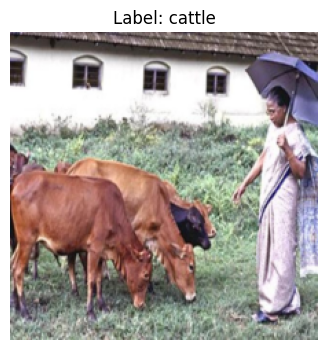

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# Path to Model A dataset
model_a_dir = "/content/dataset/dataset/model_a"

# Load dataset (only for visualization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

# Get first image and label
img, label = cattle_dataset[0]

# Convert tensor → numpy (CHW → HWC)
np_img = img.numpy().transpose((1, 2, 0))

# Undo normalization (mean=0.5, std=0.5)
np_img = np_img * 0.5 + 0.5

# Show image
plt.figure(figsize=(4,4))
plt.imshow(np_img)
plt.title(f"Label: {cattle_dataset.classes[label]}")
plt.axis("off")
plt.show()


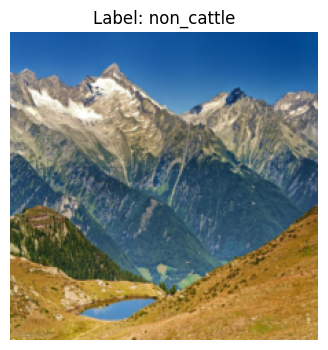

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# -------------------------------
# Model A dataset path
# -------------------------------
model_a_dir = "/content/dataset/dataset/model_a"

# Load dataset (for DataLoader)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

from torch.utils.data import DataLoader

# Create DataLoader for training
train_dataloader = DataLoader(cattle_dataset, batch_size=32, shuffle=True)

# -------------------------------
# Get first batch
# -------------------------------
images, labels = next(iter(train_dataloader))

# Pick first image in the batch
img = images[0]
label = labels[0]

# Convert tensor -> numpy (CHW -> HWC) and undo normalization
np_img = img.numpy().transpose((1, 2, 0))
np_img = np_img * 0.5 + 0.5

# Plot
plt.figure(figsize=(4,4))
plt.imshow(np_img)
plt.title(f"Label: {cattle_dataset.classes[label]}")
plt.axis("off")
plt.show()


In [ ]:
# ===============================
# 📌 STEP 1: Import Libraries
# ===============================
from torchvision import datasets, transforms

# ===============================
# 📌 STEP 2: Set Dataset Path for Model A
# ===============================
data_dir = "/content/dataset/dataset/model_a"  # Correct path for Model A

# Verify folder exists
import os
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset path not found: {data_dir}")
print(f"📂 Using dataset root: {data_dir}")
print("📂 Subfolders (classes):", os.listdir(data_dir))

# ===============================
# 📌 STEP 3: Define Transform
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# ===============================
# 📌 STEP 4: Load Dataset
# ===============================
cattle_dataset = datasets.ImageFolder(data_dir, transform=transform)

# ===============================
# 📌 STEP 5: Encode Labels & Show Info
# ===============================
print(f"✅ Total images: {len(cattle_dataset)}")
print(f"✅ Total classes: {len(cattle_dataset.classes)}")
print(f"✅ Class names: {', '.join(cattle_dataset.classes)}")

# Encoded labels (class_name → numeric ID)
encoded_labels = [str(cattle_dataset.class_to_idx[class_name]) for class_name in cattle_dataset.classes]
print(f"✅ Encoded labels: {', '.join(encoded_labels)}")

# Class-to-index mapping dictionary
print(f"✅ Class-to-Index Mapping: {cattle_dataset.class_to_idx}")


📂 Using dataset root: /content/dataset/dataset/model_a
📂 Subfolders (classes): ['cattle', 'non_cattle']
✅ Total images: 3534
✅ Total classes: 2
✅ Class names: cattle, non_cattle
✅ Encoded labels: 0, 1
✅ Class-to-Index Mapping: {'cattle': 0, 'non_cattle': 1}


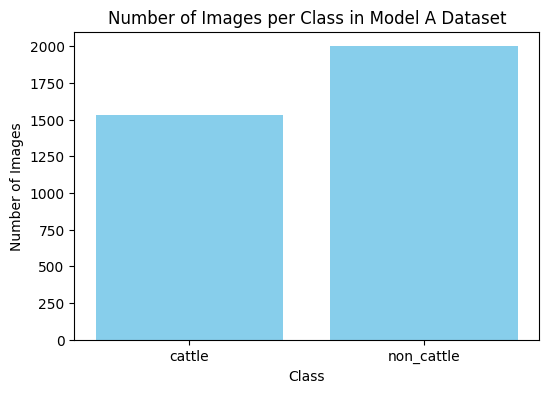

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# -------------------------------
# Label → Class name mapping for Model A
# -------------------------------
label_to_values = {v: k for k, v in cattle_dataset.class_to_idx.items()}

# Count instances of each label in the dataset
all_labels = [label for _, label in cattle_dataset]
label_counts = Counter(all_labels)

# Prepare data for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())
class_names = [label_to_values[label] for label in labels]

# -------------------------------
# Plot bar chart
# -------------------------------
plt.figure(figsize=(6,4))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Model A Dataset')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_image_frame(nrows=1, ncols=1, figsize=(12, 8)):
    """
    Create a matplotlib figure with subplots of specified shape.

    Args:
        nrows (int): Number of rows of subplots.
        ncols (int): Number of columns of subplots.
        figsize (tuple): Figure size (width, height).

    Returns:
        fig (Figure): Matplotlib figure object.
        axs_list (list): Flattened list of axes objects for easy iteration.
    """
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Flatten axes array for easier iteration
    if isinstance(axs, np.ndarray):
        axs_list = axs.flatten()
    else:
        axs_list = [axs]

    return fig, axs_list


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(axs, x, y, xlabels=None, ylabels=None, titles=None, rotation=45, width=0.5):
    """
    Plot bar graphs on provided axes.

    Args:
        axs (list): List of matplotlib axes objects.
        x (list of lists): X values (categories) for each subplot.
        y (list of lists): Y values (counts) for each subplot.
        xlabels (list): Labels for x-axis of each subplot (optional).
        ylabels (list): Labels for y-axis of each subplot (optional).
        titles (list): Titles for each subplot (optional).
        rotation (int): Rotation of x-axis labels.
        width (float): Width of bars.

    Returns:
        None
    """
    # Validate input lengths
    if len(axs) != len(x) or len(x) != len(y):
        raise ValueError("Length of axs, x, and y must be the same")

    # Default labels/titles
    if xlabels is None:
        xlabels = [''] * len(axs)
    if ylabels is None:
        ylabels = [''] * len(axs)
    if titles is None:
        titles = [''] * len(axs)

    for i, ax in enumerate(axs):
        xi = np.arange(len(x[i]))  # positions of bars
        ax.bar(xi, y[i], width=width, edgecolor='white', align='center')
        ax.set_title(titles[i])
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel(ylabels[i])
        ax.set_xticks(xi)
        ax.set_xticklabels(x[i], rotation=rotation)

    plt.tight_layout()
    plt.show()


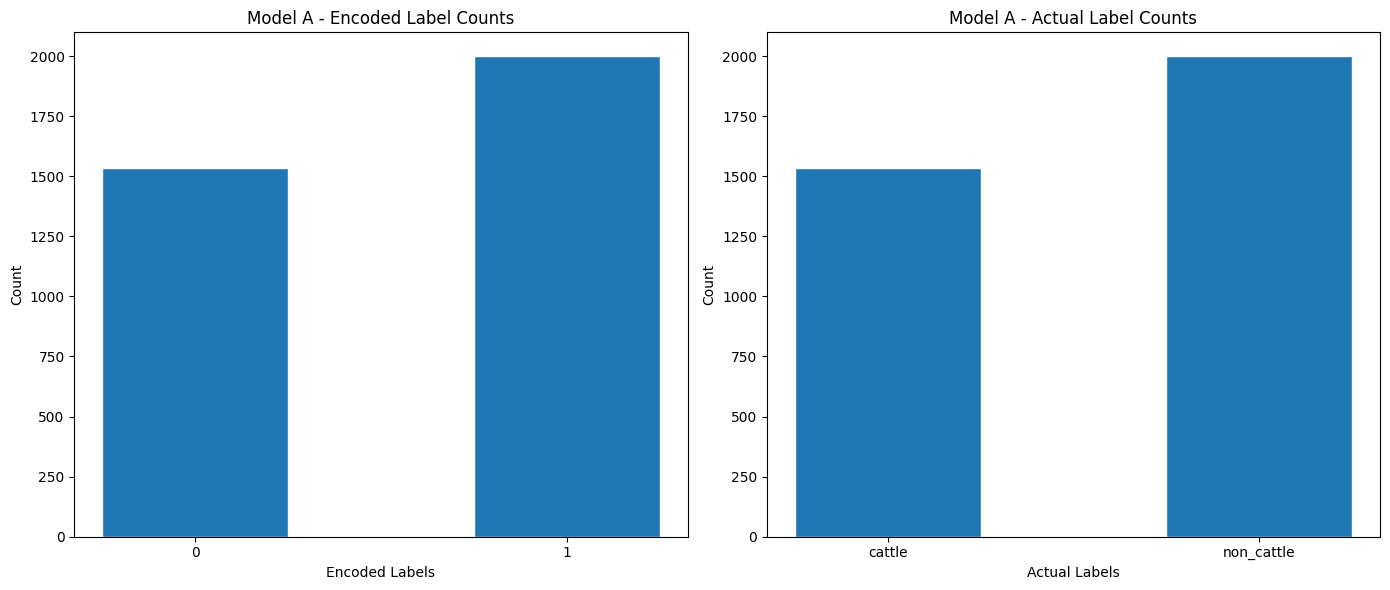

In [ ]:
from collections import Counter

# -------------------------------
# 1️⃣ Count labels in Model A dataset
# -------------------------------
all_labels = [label for _, label in cattle_dataset]
label_counts = Counter(all_labels)

# -------------------------------
# 2️⃣ Prepare encoded labels and counts
# -------------------------------
encoded_labels = list(label_counts.keys())
counts = list(label_counts.values())

# Map encoded labels to actual class names
encoded_to_actual = {v: k for k, v in cattle_dataset.class_to_idx.items()}
actual_label_counts = {encoded_to_actual[k]: v for k, v in label_counts.items()}

# Optional: sort by count
actual_label_counts = dict(sorted(actual_label_counts.items(), key=lambda x: x[1]))

# -------------------------------
# 3️⃣ Create a figure with 1 row, 2 columns
# -------------------------------
fig, axs = get_image_frame(nrows=1, ncols=2, figsize=(14,6))

# -------------------------------
# 4️⃣ Define data for plotting
# -------------------------------
x_values = [list(encoded_labels), list(actual_label_counts.keys())]
y_values = [list(counts), list(actual_label_counts.values())]
xlabels = ['Encoded Labels', 'Actual Labels']
ylabels = ['Count', 'Count']
titles = ['Model A - Encoded Label Counts', 'Model A - Actual Label Counts']

# -------------------------------
# 5️⃣ Plot side-by-side graphs
# -------------------------------
plot_graph(axs, x_values, y_values, xlabels=xlabels, ylabels=ylabels, titles=titles, rotation=0)


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model A dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_a"  # Correct path for Model A

# -------------------------------
# 2️⃣ Transform: Resize, ToTensor, Normalize
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Resize all images to 224x224
    transforms.ToTensor(),                   # Convert image to tensor (C,H,W), pixel values [0,1]
    transforms.Normalize(mean=[0.5,0.5,0.5], # Normalize to [-1,1]
                         std=[0.5,0.5,0.5])
])

# -------------------------------
# 3️⃣ Load dataset with transform
# -------------------------------
model_a_dataset = ImageFolder(root=data_path, transform=transform)

# -------------------------------
# 4️⃣ Inspect first image
# -------------------------------
image_tensor, label = model_a_dataset[0]

print("✅ Tensor shape (C,H,W):", image_tensor.shape)
print("✅ Pixel value range:", image_tensor.min().item(), "to", image_tensor.max().item())
print("✅ Encoded label:", label)                   # 0 or 1
print("✅ Class name:", model_a_dataset.classes[label])  # 'cattle' or 'non_cattle'


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Pixel value range: -0.9607843160629272 to 1.0
✅ Encoded label: 0
✅ Class name: cattle


Number of images: 5


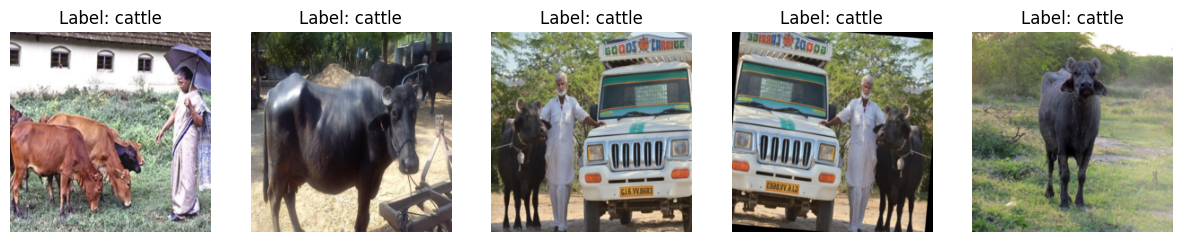

In [ ]:
import matplotlib.pyplot as plt

def display_images_from_tensor(tensors, labels, class_names=None):
    """
    Display images from PyTorch tensors in a row.

    Args:
        tensors (list or tensor): List of image tensors (C,H,W) or a batch tensor.
        labels (list or tensor): Corresponding labels (encoded integers or strings).
        class_names (list, optional): List of class names for encoded labels.
    """
    num_images = len(tensors)
    print(f"Number of images: {num_images}")

    # Get a figure and axes using previously defined helper
    fig, axs = get_image_frame(1, num_images, figsize=(3*num_images, 4))

    for i in range(num_images):
        # Convert tensor to numpy for plotting (C,H,W → H,W,C)
        np_img = tensors[i].permute(1, 2, 0).numpy()

        # If pixel values are normalized to [-1,1], unnormalize them
        if np_img.min() < 0 or np_img.max() > 1:
            np_img = (np_img + 1) / 2

        axs[i].imshow(np_img)

        # Display label (use class_names if provided)
        label_name = class_names[labels[i]] if class_names is not None else labels[i]
        axs[i].set_title(f"Label: {label_name}")
        axs[i].axis('off')

    plt.show()

# -------------------------------
# Example usage for Model A
# -------------------------------
# Get first 5 images and labels from model_a_dataset
tensors = [model_a_dataset[i][0] for i in range(5)]
labels = [model_a_dataset[i][1] for i in range(5)]

# Display images with class names
display_images_from_tensor(tensors, labels, class_names=model_a_dataset.classes)



In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model A dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_a"  # Model A folder (cattle vs non_cattle)

# -------------------------------
# 2️⃣ Define transformations
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor()            # Convert to tensor (C,H,W), pixel values [0,1]
])

# -------------------------------
# 3️⃣ Load dataset with transformations
# -------------------------------
model_a_dataset_transformed = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 4️⃣ Check first image
# -------------------------------
img, label = model_a_dataset_transformed[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_a_dataset_transformed.classes[label])  # 'cattle' or 'non_cattle'

# -------------------------------
# 5️⃣ Create a mapping from encoded label → actual class name
# -------------------------------
encoded_labels_to_actual_labels = {v: k for k, v in model_a_dataset_transformed.class_to_idx.items()}
print("✅ Encoded label → Class name mapping:", encoded_labels_to_actual_labels)
# Expected output: {0: 'cattle', 1: 'non_cattle'}


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Encoded label: 0
✅ Class name: cattle
✅ Encoded label → Class name mapping: {0: 'cattle', 1: 'non_cattle'}


Actual label : cattle
Encoded label : 0
Number of images: 2


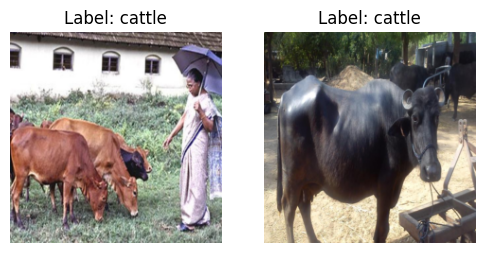

Actual label : non_cattle
Encoded label : 1
Number of images: 2


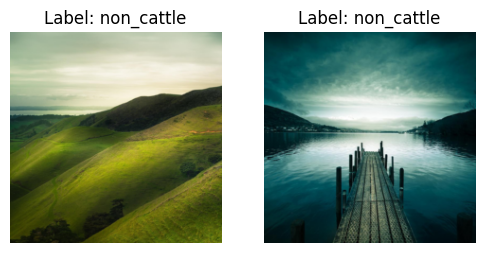

In [ ]:
num_of_iteration = 2  # Number of classes to display (cattle + non_cattle)

for encoded_label, actual_label in encoded_labels_to_actual_labels.items():
    print(f"Actual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors for this label in Model A dataset
    selected_tensors = [t for t, i in model_a_dataset_transformed if i == int(encoded_label)]
    display_count = min(2, len(selected_tensors))  # Display max 2 images

    # Display first 2 images
    display_images_from_tensor(selected_tensors[:display_count],
                               [int(encoded_label)]*display_count,
                               class_names=model_a_dataset_transformed.classes)

    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Encoded label: 0
✅ Class name: cattle

Actual label : cattle
Encoded label : 0
Number of images in this category: 1534
Number of images: 2


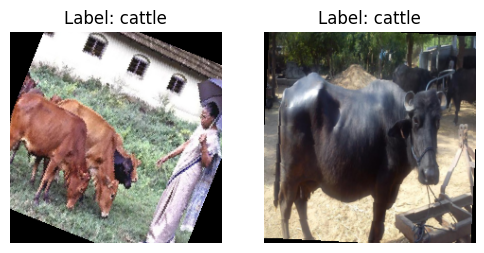


Actual label : non_cattle
Encoded label : 1
Number of images in this category: 2000
Number of images: 2


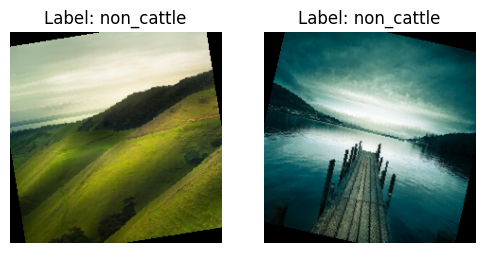

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformations for augmentation
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Resize((224, 224)),       # Resize first
    transforms.RandomRotation(30),       # Rotate up to ±30 degrees
    transforms.ToTensor()                # Convert to tensor last
])

# -------------------------------
# 2️⃣ Load Model A dataset with transformations
# -------------------------------
model_a_dataset_rotated = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Check first image
# -------------------------------
img, label = model_a_dataset_rotated[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_a_dataset_rotated.classes[label])

# -------------------------------
# 4️⃣ Display images per category
# -------------------------------
images_per_category = 2
num_of_iteration = 2  # Number of categories to display

for encoded_label, actual_label in encoded_labels_to_actual_labels.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors belonging to this label
    selected_tensors = [t for t, i in model_a_dataset_rotated if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images using the display function
    display_images_from_tensor(
        selected_tensors[:display_count],
        [int(encoded_label)]*display_count,        # Pass encoded labels for proper mapping
        class_names=model_a_dataset_rotated.classes
    )

    # Stop after the specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([3, 32, 32])
✅ Encoded label: 0
✅ Class name: cattle

Actual label : cattle
Encoded label : 0
Number of images in this category: 1534
Number of images: 2


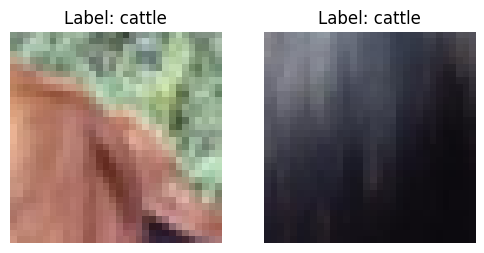


Actual label : non_cattle
Encoded label : 1
Number of images in this category: 2000
Number of images: 2


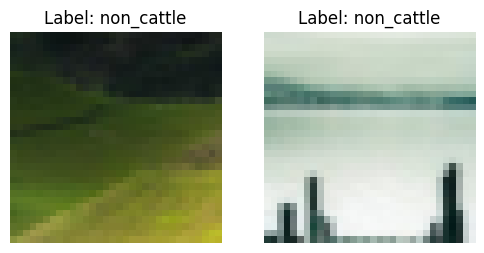

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformations for cropping
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Resize((224, 224)),      # Resize first
    transforms.CenterCrop(32),          # Then crop the center
    transforms.ToTensor()               # Convert to tensor last
])

# -------------------------------
# 2️⃣ Load Model A dataset with transformations
# -------------------------------
model_a_dataset_cropped = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Check first image
# -------------------------------
img, label = model_a_dataset_cropped[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_a_dataset_cropped.classes[label])

# -------------------------------
# 4️⃣ Display images per category
# -------------------------------
images_per_category = 2
num_of_iteration = 2  # Number of categories to display

for encoded_label, actual_label in encoded_labels_to_actual_labels.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors belonging to this label
    selected_tensors = [t for t, i in model_a_dataset_cropped if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images using the display function
    display_images_from_tensor(
        selected_tensors[:display_count],
        [int(encoded_label)]*display_count,        # Pass encoded labels for proper mapping
        class_names=model_a_dataset_cropped.classes
    )

    # Stop after the specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([1, 224, 224])
✅ Encoded label: 0
✅ Class name: cattle

Actual label : cattle
Encoded label : 0
Number of images in this category: 1534
Number of images: 2


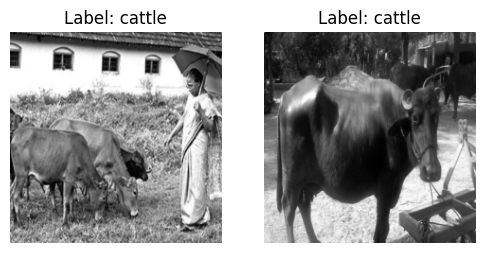


Actual label : non_cattle
Encoded label : 1
Number of images in this category: 2000
Number of images: 2


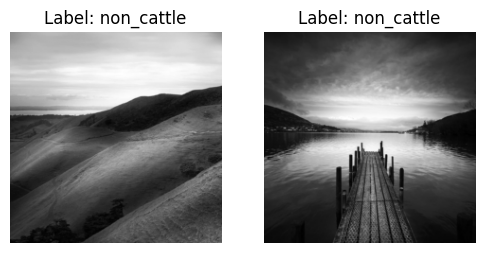

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Define grayscale transformations
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),                # Resize image
    transforms.ToTensor()                         # Convert to tensor
])

# -------------------------------
# 2️⃣ Load Model A dataset (grayscale)
# -------------------------------
model_a_dataset_gray = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Inspect first image
# -------------------------------
img, label = model_a_dataset_gray[0]
print("✅ Tensor shape (C,H,W):", img.shape)  # Should be [1, 224, 224]
print("✅ Encoded label:", label)
print("✅ Class name:", model_a_dataset_gray.classes[label])

# -------------------------------
# 4️⃣ Display function for grayscale or RGB images
# -------------------------------
def display_images_from_tensor(tensors, labels, class_names=None):
    num_images = len(tensors)
    print(f"Number of images: {num_images}")

    fig, axs = get_image_frame(1, num_images, figsize=(3*num_images, 4))

    for i in range(num_images):
        img = tensors[i]
        # Convert tensor to numpy for plotting
        if img.shape[0] == 1:  # Grayscale (C=1)
            np_img = img.squeeze(0).numpy()
            cmap = 'gray'
        else:  # RGB (C=3)
            np_img = img.permute(1, 2, 0).numpy()
            cmap = None

        axs[i].imshow(np_img, cmap=cmap)
        label_name = class_names[labels[i]] if class_names is not None else labels[i]
        axs[i].set_title(f"Label: {label_name}")
        axs[i].axis('off')

    plt.show()

# -------------------------------
# 5️⃣ Example: display first 2 images per class
# -------------------------------
images_per_category = 2
num_of_iteration = 2

for encoded_label, actual_label in encoded_labels_to_actual_labels.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors for this label
    selected_tensors = [t for t, i in model_a_dataset_gray if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images
    tensors_to_display = selected_tensors[:display_count]
    display_images_from_tensor(
        tensors_to_display,
        [int(encoded_label)]*display_count,
        class_names=model_a_dataset_gray.classes
    )

    # Stop after specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break



Actual label : non_cattle
Encoded label : 1
Number of images in this category: 2000
Number of images: 2


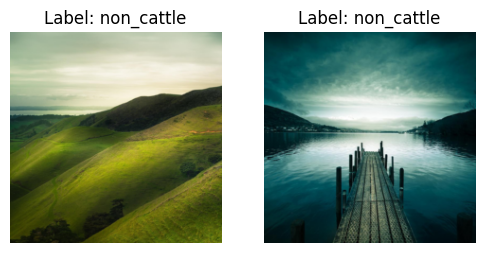


Actual label : cattle
Encoded label : 0
Number of images in this category: 1534
Number of images: 2


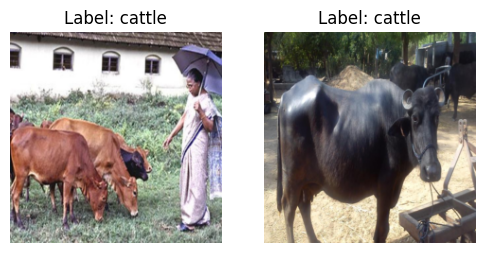

In [ ]:
from torchvision import transforms
import random

# -------------------------------
# 1️⃣ Get a composed transform
# -------------------------------
def get_transform(transform_list):
    """
    Returns a composed torchvision transform from a list of transformations.

    Args:
        transform_list (list): List of torchvision transform objects.

    Returns:
        torchvision.transforms.Compose: Composed transformation.
    """
    if not isinstance(transform_list, list):
        raise TypeError("Expected a list of torchvision transforms")

    if len(transform_list) == 0:
        raise ValueError("Transform list cannot be empty")

    return transforms.Compose(transform_list)

# Example usage for Model A
model_a_transform = get_transform([
    transforms.Resize((224, 224)),           # Resize all images to 224x224
    transforms.ToTensor(),                   # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], # Normalize
                         std=[0.5,0.5,0.5])
])

# -------------------------------
# 2️⃣ Display sample images function
# -------------------------------
def display_sample_images(dataset, encoded_labels_to_actual_labels, num_of_labels=2, images_per_label=2):
    """
    Display sample transformed images from a dataset.

    Args:
        dataset (ImageFolder): PyTorch dataset with transformed images.
        encoded_labels_to_actual_labels (dict): Mapping from encoded labels to actual class names.
        num_of_labels (int): Number of random labels to display.
        images_per_label (int): Number of images to display per label.
    """
    # List of all encoded labels
    label_list = list(encoded_labels_to_actual_labels.keys())

    # Randomly select labels
    random_label_list = random.sample(label_list, min(num_of_labels, len(label_list)))

    for label in random_label_list:
        actual_label = encoded_labels_to_actual_labels[label]
        print(f"\nActual label : {actual_label}")
        print(f"Encoded label : {label}")

        # Select all images for this label
        selected_tensors = [t for t, i in dataset if i == int(label)]
        print("Number of images in this category:", len(selected_tensors))

        # Limit to the number of images per label
        display_count = min(images_per_label, len(selected_tensors))

        # Display images using previously defined function
        tensors_to_display = selected_tensors[:display_count]
        display_images_from_tensor(
            tensors_to_display,
            [int(label)]*display_count,
            class_names=dataset.classes
        )

# -------------------------------
# 3️⃣ Example usage for Model A
# -------------------------------
display_sample_images(
    dataset=model_a_dataset_transformed,                   # Model A dataset (cattle vs non_cattle)
    encoded_labels_to_actual_labels=encoded_labels_to_actual_labels,  # Mapping {0:'cattle',1:'non_cattle'}
    num_of_labels=2,                                       # Randomly pick 2 classes
    images_per_label=2                                     # Display 2 images per class
)



Actual label : cattle
Encoded label : 0


Number of images in this category: 1534
Number of images: 2


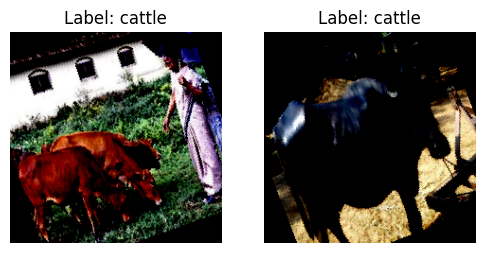


Actual label : non_cattle
Encoded label : 1


Number of images in this category: 2000
Number of images: 2


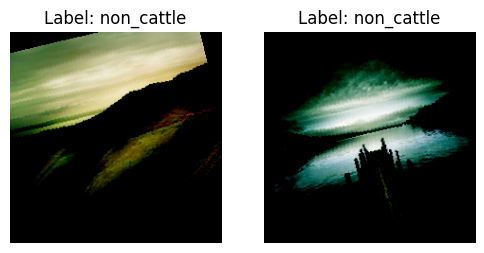

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformation chain for Model A
# -------------------------------
transformation_chain = get_transform([
    transforms.Resize((224, 224)),                   # Resize all images
    transforms.RandomRotation(degrees=30),          # Random rotation ±30 degrees
    transforms.ToTensor(),                           # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5],      # Normalize RGB channels
                         std=[0.5, 0.5, 0.5])
])

# -------------------------------
# 2️⃣ Apply transformation to Model A dataset
# -------------------------------
model_a_transformed_dataset = ImageFolder(root=data_path, transform=transformation_chain)

# -------------------------------
# 3️⃣ Display sample images
# -------------------------------
# Using the previous function for displaying sample images
display_sample_images(
    dataset=model_a_transformed_dataset,
    encoded_labels_to_actual_labels=encoded_labels_to_actual_labels,  # {0:'cattle',1:'non_cattle'}
    num_of_labels=2,          # Display 2 classes (cattle & non_cattle)
    images_per_label=2        # 2 images per class
)


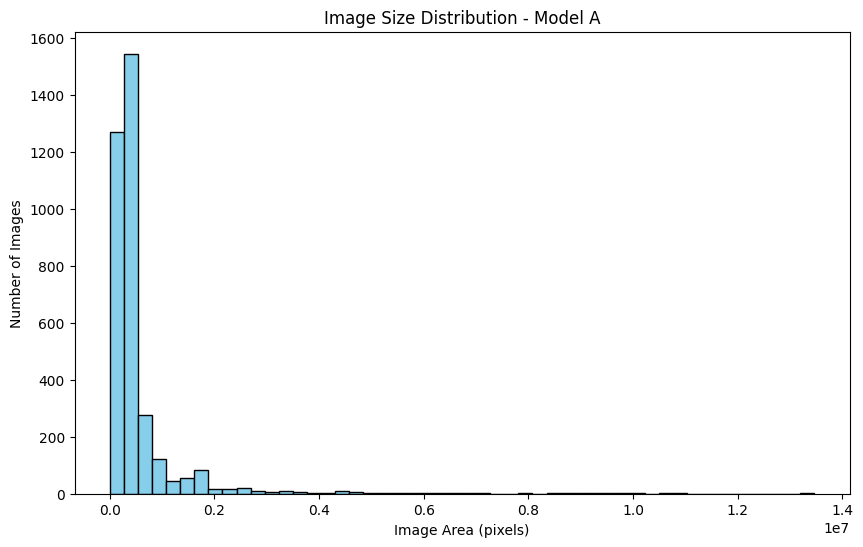

In [ ]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Path to Model A dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_a"  # Model A folder (cattle vs non_cattle)

# -------------------------------
# 2️⃣ Load dataset without transforms to get original image sizes
# -------------------------------
dataset_no_transform = ImageFolder(root=data_path, transform=None)

# -------------------------------
# 3️⃣ Extract image sizes (width × height)
# -------------------------------
sizes = [img[0].size[0] * img[0].size[1] for img in dataset_no_transform]

# -------------------------------
# 4️⃣ Plot histogram of image areas
# -------------------------------
plt.figure(figsize=(10,6))
plt.hist(sizes, bins=50, color='skyblue', edgecolor='black')
plt.title('Image Size Distribution - Model A')
plt.xlabel('Image Area (pixels)')
plt.ylabel('Number of Images')
plt.show()


/tmp/ipython-input-970513319.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  images_matrix = torch.tensor(images).numpy()


Image matrix shape: (3534, 150528)
Transformed PCA shape: (3534, 50)


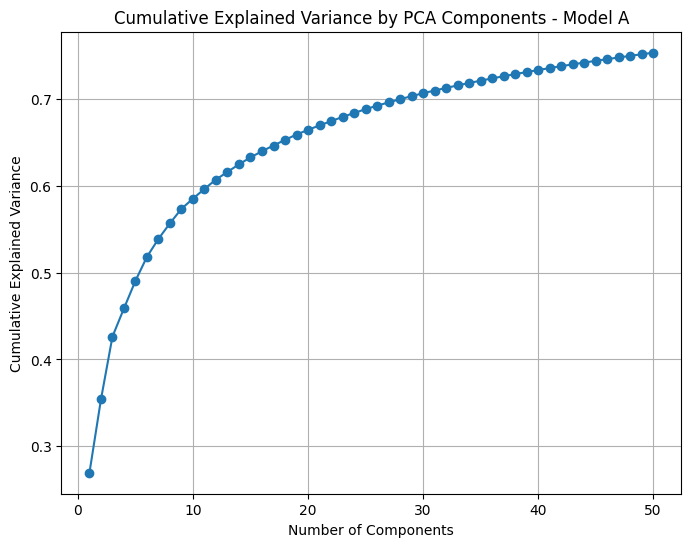

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model A dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_a"  # Model A folder (cattle vs non_cattle)

# -------------------------------
# 2️⃣ Load dataset with normalization
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

model_a_dataset = ImageFolder(root=data_path, transform=transform)

# -------------------------------
# 3️⃣ Collect flattened images for PCA
# -------------------------------
images = []
for img, _ in model_a_dataset:
    # Unnormalize pixel values from [-1,1] to [0,1]
    img = (img + 1) / 2
    images.append(img.view(-1).numpy())

images_matrix = torch.tensor(images).numpy()
print(f"Image matrix shape: {images_matrix.shape}")  # (num_images, num_pixels)

# -------------------------------
# 4️⃣ Apply PCA
# -------------------------------
pca = PCA(n_components=50)  # keep 50 principal components
images_pca = pca.fit_transform(images_matrix)
print(f"Transformed PCA shape: {images_pca.shape}")  # (num_images, 50)

# -------------------------------
# 5️⃣ Plot cumulative explained variance
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(range(1, 51), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components - Model A")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model A dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_a"

# -------------------------------
# 2️⃣ Define transformations
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to fixed size
    transforms.ToTensor(),                        # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5],    # Normalize
                         std=[0.5, 0.5, 0.5])
])

# -------------------------------
# 3️⃣ Load Model A dataset
# -------------------------------
model_a_dataset = ImageFolder(root=data_path, transform=transform)

# -------------------------------
# 4️⃣ Create DataLoader for batching
# -------------------------------
loader = torch.utils.data.DataLoader(model_a_dataset, batch_size=32, shuffle=False)

# -------------------------------
# 5️⃣ Flatten and collect all images
# -------------------------------
all_images = []
for imgs, _ in loader:
    # Unnormalize to [0,1] if data is in [-1,1]
    imgs = (imgs + 1) / 2
    # Flatten each image (batch_size, H*W*C)
    batch_flattened = imgs.view(imgs.size(0), -1).numpy()
    all_images.append(batch_flattened)

# Stack into a single NumPy array
all_images = np.vstack(all_images)
print("✅ Shape of data matrix for PCA:", all_images.shape)  # (N_samples, N_features)

# -------------------------------
# 6️⃣ Apply PCA (reduce to 2D)
# -------------------------------
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_images)
print("✅ Shape of reduced data:", reduced_data.shape)  # (N_samples, 2)


✅ Shape of data matrix for PCA: (3534, 150528)
✅ Shape of reduced data: (3534, 2)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import random
import os

# ============================================================
# 1️⃣ Dataset Path & Transformations
# ============================================================
data_dir = "/content/dataset/dataset/model_a"  # Model A (cattle vs non_cattle)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet normalization
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 2️⃣ Train/Val/Test Split Function
# ============================================================
def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    """Split dataset into train, validation, and test sets (stratified by class)."""
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
    val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32, shuffle=False)
    test_loader  = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)

    print(f"📊 Split sizes → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = train_val_test_split(dataset)

# ============================================================
# 3️⃣ Load & Prepare ResNet50 Model
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

resnet = models.resnet50(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)  # 2 classes: cattle / non_cattle
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=1e-4)

# ============================================================
# 4️⃣ Training Loop
# ============================================================
num_epochs = 10
best_val_acc = 0
save_path = "/content/drive/MyDrive/best_resnet_model_a.pth"

for epoch in range(num_epochs):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # ---------------- Validation ----------------
    resnet.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(resnet.state_dict(), save_path)

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Acc: {val_acc:.2f}%")

print(f"✅ Training complete! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


✅ Classes detected (2): ['cattle', 'non_cattle']
📊 Split sizes → Train: 2827, Val: 353, Test: 354
💻 Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


📅 Epoch 1/10 | Train Loss: 0.1253 | Train Acc: 95.12% | Val Acc: 97.45%
📅 Epoch 2/10 | Train Loss: 0.0196 | Train Acc: 99.50% | Val Acc: 97.73%
📅 Epoch 3/10 | Train Loss: 0.0077 | Train Acc: 99.65% | Val Acc: 98.02%
📅 Epoch 4/10 | Train Loss: 0.0142 | Train Acc: 99.58% | Val Acc: 98.02%
📅 Epoch 5/10 | Train Loss: 0.0107 | Train Acc: 99.79% | Val Acc: 98.02%
📅 Epoch 6/10 | Train Loss: 0.0103 | Train Acc: 99.50% | Val Acc: 97.17%
📅 Epoch 7/10 | Train Loss: 0.0241 | Train Acc: 99.08% | Val Acc: 97.45%
📅 Epoch 8/10 | Train Loss: 0.0357 | Train Acc: 98.97% | Val Acc: 98.30%
📅 Epoch 9/10 | Train Loss: 0.0193 | Train Acc: 99.36% | Val Acc: 94.33%
📅 Epoch 10/10 | Train Loss: 0.0294 | Train Acc: 98.80% | Val Acc: 96.60%
✅ Training complete! Best Validation Accuracy: 98.30%
💾 Best model saved at: /content/drive/MyDrive/best_resnet_model_a.pth


Using device: cuda
✅ Classes detected (2): ['cattle', 'non_cattle']
✅ Test samples: 354


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded successfully!
📊 Classification Report:
              precision    recall  f1-score   support

      cattle       0.99      0.99      0.99       154
  non_cattle       0.99      0.99      0.99       200

    accuracy                           0.99       354
   macro avg       0.99      0.99      0.99       354
weighted avg       0.99      0.99      0.99       354



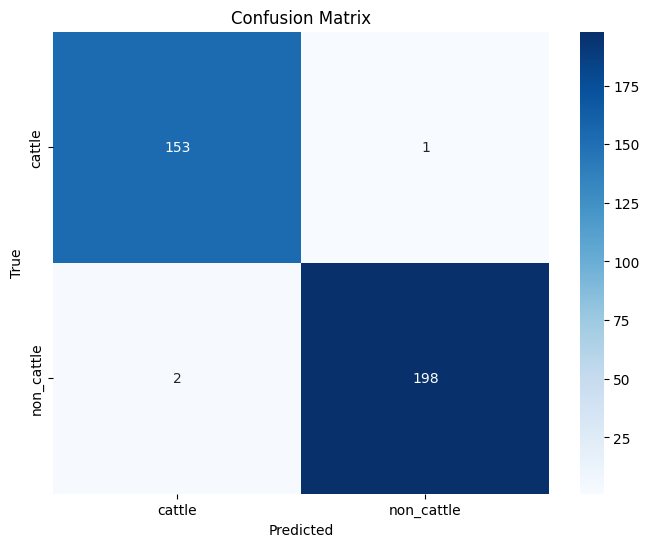

🔥 ROC–AUC Score: 0.9992


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


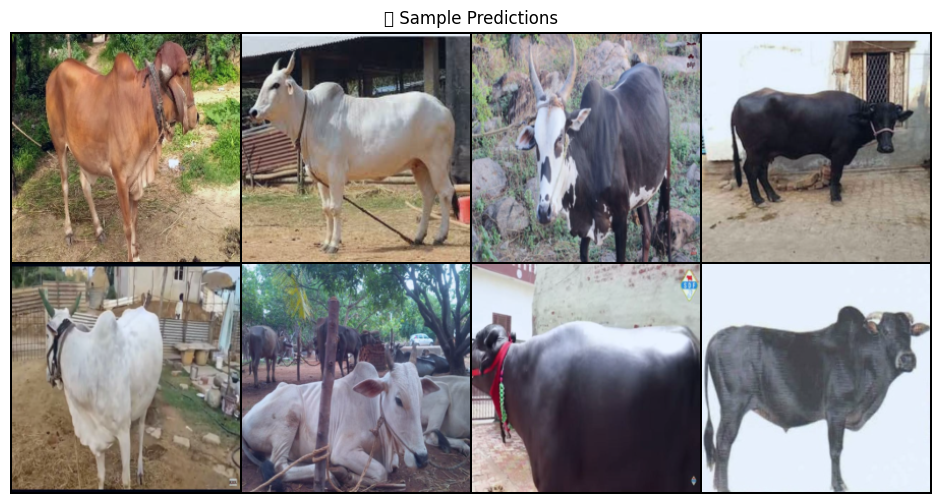

Predicted: ['cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle']
True Labels: ['cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle', 'cattle']

✅ Evaluation complete for Model A!


In [ ]:
# ===========================================
# 📦 Import Libraries
# ===========================================
import os
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision.utils import make_grid

# ===========================================
# ⚙️ Setup
# ===========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_path = "/content/dataset/dataset/model_a"
model_path = "/content/drive/MyDrive/best_resnet_model_a.pth"

# ===========================================
# 📁 Load Dataset (same transform as training)
# ===========================================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_path, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# Split dataset (same logic as before)
from collections import defaultdict
import random

def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    test_loader = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)
    print(f"✅ Test samples: {len(test_idx)}")
    return test_loader

test_loader = train_val_test_split(dataset)

# ===========================================
# 🧠 Load Trained Model
# ===========================================
resnet = models.resnet50(pretrained=False)
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
resnet.load_state_dict(torch.load(model_path, map_location=device))
resnet = resnet.to(device)
resnet.eval()
print("✅ Model loaded successfully!")

# ===========================================
# 📊 Evaluation Metrics
# ===========================================
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs[:, 1].cpu().numpy() if num_classes == 2 else probs.cpu().numpy())

# Convert to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# ===========================================
# 📈 Classification Report
# ===========================================
print("📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# ===========================================
# 🧩 Confusion Matrix
# ===========================================
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ===========================================
# 📉 ROC-AUC (for binary classification)
# ===========================================
if num_classes == 2:
    auc = roc_auc_score(all_labels, all_probs)
    print(f"🔥 ROC–AUC Score: {auc:.4f}")

# ===========================================
# 🖼️ Visualize Model Predictions
# ===========================================
resnet.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = resnet(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(12,6))
grid = make_grid(images[:8].cpu(), nrow=4, normalize=True)
plt.imshow(np.transpose(grid, (1, 2, 0)))
plt.axis('off')
plt.title("🔍 Sample Predictions")
plt.show()

print("Predicted:", [class_names[p] for p in preds[:8]])
print("True Labels:", [class_names[l] for l in labels[:8]])

print("\n✅ Evaluation complete for Model A!")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model A loaded successfully!
📂 Classes: ['cattle', 'non_cattle']


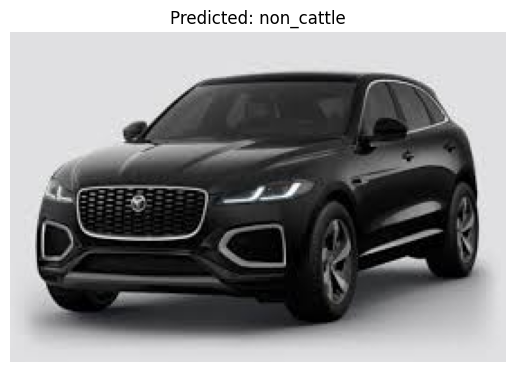

📸 image1.jpg → 🧠 Predicted as: non_cattle


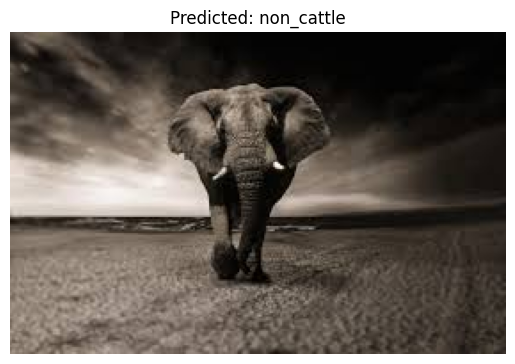

📸 image2.jpg → 🧠 Predicted as: non_cattle


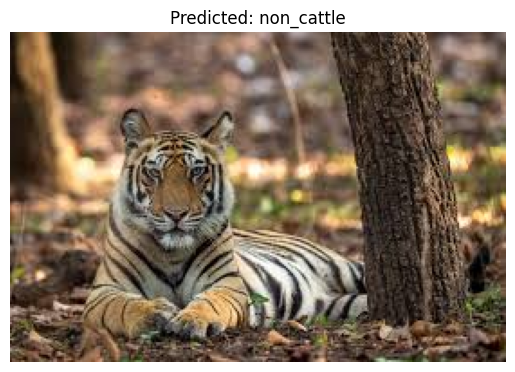

📸 image3.jpg → 🧠 Predicted as: non_cattle


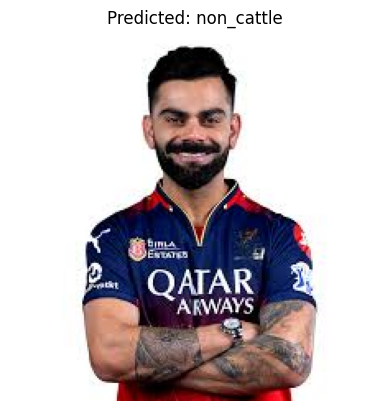

📸 image4.jpg → 🧠 Predicted as: non_cattle


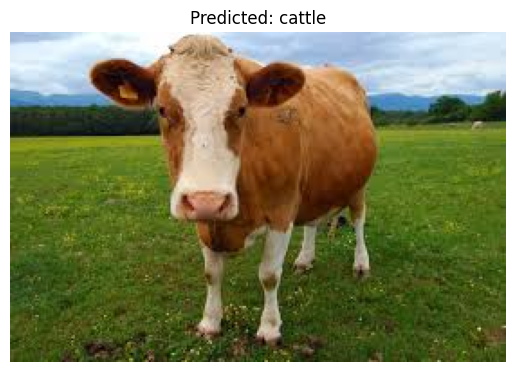

📸 image5.jpg → 🧠 Predicted as: cattle


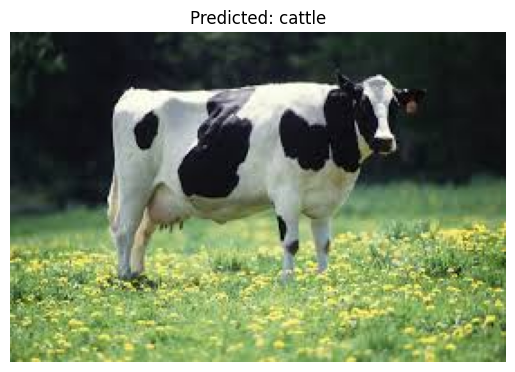

📸 image6.jpg → 🧠 Predicted as: cattle


In [ ]:
# ===============================
# 📌 STEP 9: Manual Testing of Model A
# ===============================

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# 1️⃣ Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(cattle_dataset.classes)  # should be 2
class_names = cattle_dataset.classes       # e.g., ['cattle', 'non_cattle']

model_a = models.resnet50(pretrained=False)
model_a.fc = nn.Linear(model_a.fc.in_features, num_classes)
model_a.load_state_dict(torch.load("/content/drive/MyDrive/best_resnet_model_a.pth", map_location=device))
model_a.to(device)
model_a.eval()

print("✅ Model A loaded successfully!")
print(f"📂 Classes: {class_names}")

# 2️⃣ Define the same preprocessing transform (must match training)
manual_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

# 3️⃣ Function to predict a single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = manual_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model_a(input_tensor)
        _, preds = torch.max(outputs, 1)
        predicted_class = class_names[preds.item()]

    # Show image with predicted label
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    return predicted_class

# 4️⃣ Test manually using your own images
# Create a folder and upload your test images there, for example:
manual_test_path = "/content/drive/MyDrive/Test_Images_ModelA"

for img_file in os.listdir(manual_test_path):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(manual_test_path, img_file)
        pred = predict_image(img_path)
        print(f"📸 {img_file} → 🧠 Predicted as: {pred}")
